<a href="https://colab.research.google.com/github/TBData2/Data2040MTProject/blob/main/Cassava_Leaf_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cassava Leaf EDA**

by TBData2


## Temporary reference
https://www.kaggle.com/ihelon/cassava-leaf-disease-exploratory-data-analysis

## Overview

In [ ]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
# import cv2
# import albumentations as A
# from sklearn import metrics as sk_metrics

In [ ]:
# Mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Cassava Leaf/data/"

Mounted at /content/drive


In [ ]:
# provide config path
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Cassava Leaf/data"

In [ ]:
# changing the working directory
%cd /content/drive/MyDrive/Cassava Leaf/data
%pwd

/content/drive/.shortcut-targets-by-id/18q-XmWJkL48k8ivOjrLxz5gz_urPuSrO/Cassava Leaf/data


'/content/drive/.shortcut-targets-by-id/18q-XmWJkL48k8ivOjrLxz5gz_urPuSrO/Cassava Leaf/data'

In [ ]:
# set up base directory
BASE_DIR = "/content/drive/MyDrive/Cassava Leaf/data/"
# checkout the label-disease map
with open(os.path.join(BASE_DIR, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
    map_classes = {int(k) : v for k, v in map_classes.items()}
    
print(json.dumps(map_classes, indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


In [ ]:
# checkout the length of training set
# should be 21397
input_files = os.listdir(os.path.join(BASE_DIR, "train_images"))
print(f"Number of train images: {len(input_files)}")

Number of train images: 21448


In [ ]:
# checkout the size of each image
img_shapes = {}
for image_name in os.listdir(os.path.join(BASE_DIR, "train_images"))[:300]:
    image = cv2.imread(os.path.join(BASE_DIR, "train_images", image_name))
    img_shapes[image.shape] = img_shapes.get(image.shape, 0) + 1

print(img_shapes)

NameError: ignored

In [ ]:
# checkout the training set as dataframe
df_train = pd.read_csv(os.path.join(BASE_DIR, "train.csv"))

df_train["class_name"] = df_train["label"].map(map_classes)

df_train

,image_id,label,class_name
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)
...,...,...,...
21392,999068805.jpg,3,Cassava Mosaic Disease (CMD)
21393,999329392.jpg,3,Cassava Mosaic Disease (CMD)
21394,999474432.jpg,1,Cassava Brown Streak Disease (CBSD)
21395,999616605.jpg,4,Healthy


In [ ]:
# checkout the value counts for each label
df_train["label"].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

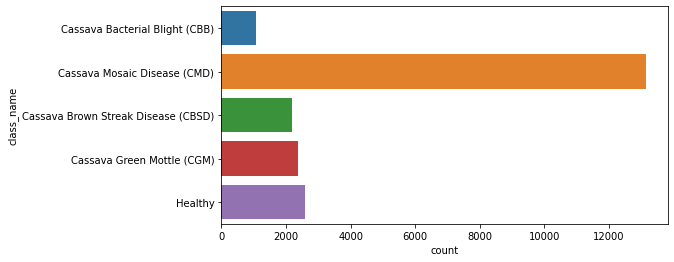

In [ ]:
# value counts to plot
# seaborn is a Python data visualization library based on matplotlib.
plt.figure(figsize=(8, 4))
sn.countplot(y="class_name", data=df_train);



## Visualization

In [ ]:
# This function takes image_ids and labels as in df_train,
# and returns
def visualize_batch(image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Class: {label}", fontsize=12)
        plt.axis("off")
    
    plt.show()

## Baseline Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from tqdm.notebook import tqdm 
np.random.seed(42)

In [ ]:
df_samp = pd.DataFrame()

df_samp = df_samp.append(df_train.sample(2000), ignore_index=True)

df_samp.groupby(by='class_name').count()

,image_id,label
class_name,,
Cassava Bacterial Blight (CBB),104,104
Cassava Brown Streak Disease (CBSD),217,217
Cassava Green Mottle (CGM),213,213
Cassava Mosaic Disease (CMD),1218,1218
Healthy,248,248


In [ ]:
from sklearn.utils import shuffle

df_samp = shuffle(df_samp).reset_index(drop=True) #shuffling the dataframe

In [ ]:
from sklearn.model_selection import train_test_split

X = df_samp.drop(columns=['label'])
y = df_samp.label

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y)

print(X_train.shape)
print(len(y_train))
print(X_valid.shape)
print(len(y_valid))

(1400, 2)
1400
(600, 2)
600


In [ ]:
lr = LogisticRegression(class_weight='balanced', verbose=5, n_jobs=-1)